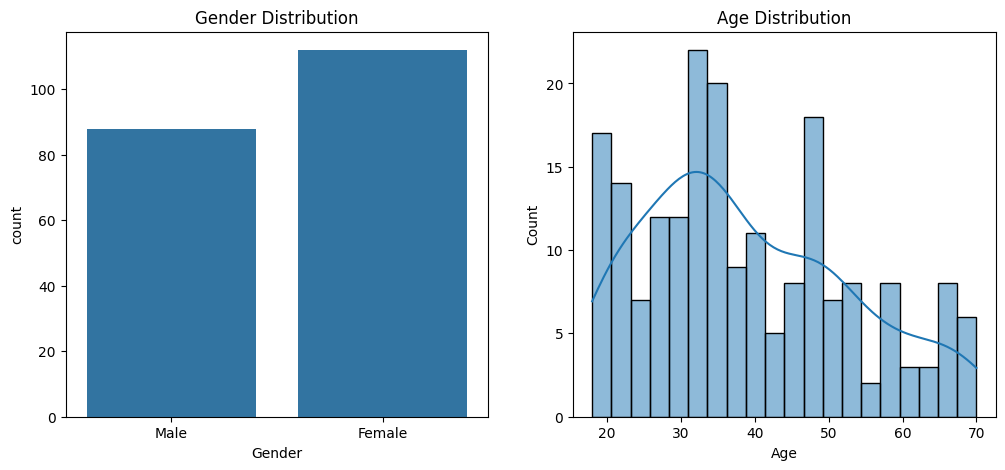

C:\Users\BHARAT\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


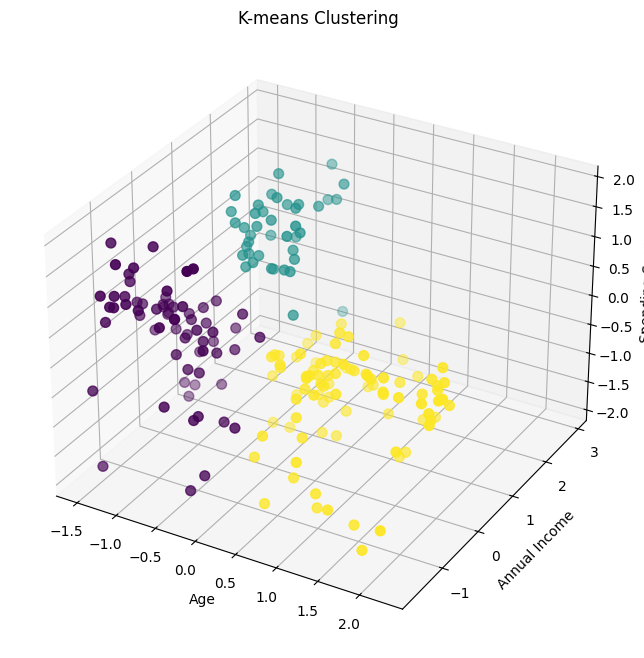

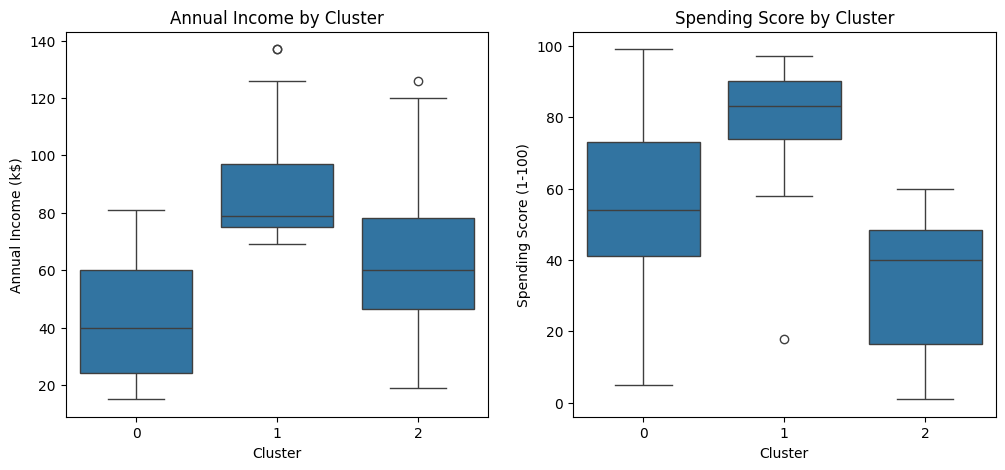

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

data = pd.read_csv('Mall_Customers.csv')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.show()

X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K-means clustering ###
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

### Visualizing clusters ###
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=data['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('K-means Clustering')

plt.show()

# Analyze annual incomes and spending scores by cluster

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data)
plt.title('Annual Income by Cluster')

plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data)
plt.title('Spending Score by Cluster')

plt.show()
